In [1]:
import numpy
import pandas
from matplotlib import pyplot

%matplotlib inline

In [2]:
season_averages = pandas.read_csv("SeasonAverages.csv")
season_averages["Season"] = season_averages["Season"].astype(numpy.int32)
season_averages["Team_Id"] = season_averages["Team_Id"].astype(numpy.int32)
regular_season = pandas.read_csv("RegularSeasonCompactResults.csv")

tourney_seeds = pandas.read_csv("TourneySeeds.csv")
tourney_seeds["Seed"] = tourney_seeds["Seed"].str.slice(1, 3).astype(numpy.int32)
tourney_seeds["Season"] = tourney_seeds["Season"].astype(numpy.int32)
tourney_seeds["Team"] = tourney_seeds["Team"].astype(numpy.int32)


In [3]:
season_averages.head()

,score,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf,Team_Id,Season,Team_Name
0,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,1102,2003,Air Force
1,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,1103,2003,Akron
2,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,1104,2003,Alabama
3,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,1105,2003,Alabama A&M
4,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,1106,2003,Alabama St


In [4]:
season_averages = season_averages.merge(tourney_seeds,
                                        left_on=["Team_Id", "Season"],
                                        right_on=["Team", "Season"], how="left")
del season_averages["Team"]
season_averages.loc[season_averages["Seed"].isnull(), "Seed"] = 17
season_averages.head()

,score,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf,Team_Id,Season,Team_Name,Seed
0,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,1102,2003,Air Force,17.0
1,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,1103,2003,Akron,17.0
2,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,1104,2003,Alabama,10.0
3,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,1105,2003,Alabama A&M,17.0
4,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,1106,2003,Alabama St,17.0


In [5]:
matchup_columns = ["Season", "home_score", "home_team", "away_score", "away_team"]

wins = regular_season[["Season", "Wscore", "Wteam", "Lscore", "Lteam"]]
wins.columns = matchup_columns

losses = regular_season[["Season", "Lscore", "Lteam", "Wscore", "Wteam"]]
losses.columns = matchup_columns

matchups = pandas.concat([wins, losses])

In [6]:
matchups.head()

,Season,home_score,home_team,away_score,away_team
0,1985,81,1228,64,1328
1,1985,77,1106,70,1354
2,1985,63,1112,56,1223
3,1985,70,1165,54,1432
4,1985,86,1192,74,1447


In [7]:
matchups.columns

Index([u'Season', u'home_score', u'home_team', u'away_score', u'away_team'], dtype='object')

In [8]:
matchups = matchups.merge(season_averages, how="inner",
                          left_on=["Season", "home_team"],
                          right_on=["Season", "Team_Id"],
                          suffixes=("_woah", "_home"))

matchups = matchups.merge(season_averages, how="inner",
                          left_on=["Season", "away_team"],
                          right_on=["Season", "Team_Id"],
                          suffixes=("_home", "_away"))

In [9]:
matchups.columns

Index([u'Season', u'home_score', u'home_team', u'away_score', u'away_team',
       u'score_home', u'fgm_home', u'fga_home', u'fgm3_home', u'fga3_home',
       u'ftm_home', u'fta_home', u'or_home', u'dr_home', u'ast_home',
       u'to_home', u'stl_home', u'blk_home', u'pf_home', u'Team_Id_home',
       u'Team_Name_home', u'Seed_home', u'score_away', u'fgm_away',
       u'fga_away', u'fgm3_away', u'fga3_away', u'ftm_away', u'fta_away',
       u'or_away', u'dr_away', u'ast_away', u'to_away', u'stl_away',
       u'blk_away', u'pf_away', u'Team_Id_away', u'Team_Name_away',
       u'Seed_away'],
      dtype='object')

In [10]:
input_columns = [col for col in matchups.columns 
                    if not (col.startswith("Team_")) 
                    and (col.endswith("_away") or col.endswith("_home"))]

In [11]:
input_columns

['score_home',
 'fgm_home',
 'fga_home',
 'fgm3_home',
 'fga3_home',
 'ftm_home',
 'fta_home',
 'or_home',
 'dr_home',
 'ast_home',
 'to_home',
 'stl_home',
 'blk_home',
 'pf_home',
 'Seed_home',
 'score_away',
 'fgm_away',
 'fga_away',
 'fgm3_away',
 'fga3_away',
 'ftm_away',
 'fta_away',
 'or_away',
 'dr_away',
 'ast_away',
 'to_away',
 'stl_away',
 'blk_away',
 'pf_away',
 'Seed_away']

In [12]:
matchups["home_win"] = matchups["home_score"] > matchups["away_score"]

In [13]:
matchups["home_win"].value_counts()

True     76636
False    76636
Name: home_win, dtype: int64

In [14]:
x_unscaled = matchups[input_columns] 
from sklearn import preprocessing
    
scaler = preprocessing.RobustScaler()
x = scaler.fit_transform(x_unscaled)
y = matchups["home_win"].astype(int)

In [15]:
from sklearn import cross_validation

kfold = cross_validation.StratifiedKFold(y, n_folds=5, shuffle=True)

In [37]:
from sklearn import ensemble
from sklearn import grid_search



models = []
for train_index, test_index in kfold:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = ensemble.GradientBoostingClassifier(n_estimators=120,
                                                subsample=0.75,
                                                learning_rate=0.25,
                                                max_depth=3)
     
    model.fit(x_train, y_train)
    print "score:", model.score(x_test, y_test)
    models.append(model)

    

#pickle.dump(models, open("2017-03-15_gbc_cv_opt_seed.pkl", 'w'))


score: 0.727002870564
score: 0.728094212827
score: 0.722776799113
score: 0.726104260455
score: 0.724016441574


In [70]:
gbm = models[0]
voter_gbm = ensemble.VotingClassifier(estimators=[(str(i), model) for i, model in enumerate(models)])


In [33]:

from keras.models import Sequential
from keras import optimizers

from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
def make_model():
    model = Sequential()
    model.add(Dense(units=100, input_dim=len(input_columns)))
    model.add(Activation('sigmoid'))
    model.add(Dense(units=2))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
    return model
model = make_model()


In [34]:
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(y)


In [36]:
models_mlp = []
for train_index, test_index in kfold:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y_binary[train_index], y_binary[test_index]
    model = KerasClassifier(make_model)
    model.fit(x_train, y_train, batch_size=100, epochs=10, verbose=0)
    print "score:", model.score(x_test, y_test, verbose=0)
    models_mlp.append(model)


score: 0.731308716075
score: 0.729040255773
score: 0.730638742101
score: 0.730051543048
score: 0.727343902913


In [49]:
mlp = models_mlp[0]
voter_mlp = ensemble.VotingClassifier([(str(i), model)
                                       for i, model in enumerate(models_mlp)])

## Past Tourney Data



In [63]:
real_tourney_results = pandas.read_csv("TourneyCompactResults.csv")
matchup_columns = ["Season", "home_score", "home_team", "away_score", "away_team"]

matchup_rows = []
for id, row in real_tourney_results.iterrows():
    matchup_rows.append(list(row[["Season", "Wscore", "Wteam", "Lscore", "Lteam"]]))
    matchup_rows.append(list(row[["Season", "Lscore", "Lteam", "Wscore", "Wteam"]]))
    
tourney_matchups = pandas.DataFrame(matchup_rows, columns=matchup_columns)

tourney_matchups = tourney_matchups.merge(season_averages, how="inner",
                          left_on=["Season", "home_team"],
                          right_on=["Season", "Team_Id"],
                          suffixes=("_woah", "_home"))

tourney_matchups = tourney_matchups.merge(season_averages, how="inner",
                          left_on=["Season", "away_team"],
                          right_on=["Season", "Team_Id"],
                          suffixes=("_home", "_away"))
tourney_matchups["home_win"] = tourney_matchups["home_score"] > tourney_matchups["away_score"]

In [64]:
tourney_x = scaler.transform(tourney_matchups[input_columns])
tourney_y = tourney_matchups["home_win"].astype(int)

In [74]:
voter = ensemble.VotingClassifier([("gbm", gbm), ("mlp", mlp)])

In [75]:
print "gbm", gbm.score(tourney_x, tourney_y)
#print "voter_gbm", voter_gbm.score(tourney_x, tourney_y)
print "mlp", mlp.score(tourney_x, tourney_y, verbose=0)
#print "voter_mlp", voter_mlp.score(tourney_x, tourney_y)


gbm 0.706236323851
mlp 0.712253829322


(array([  10.,   66.,  108.,  108.,  112.,  117.,  109.,   70.,   85.,
          76.,   93.,   99.,   95.,   94.,  122.,  129.,  115.,  139.,
          74.,    7.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

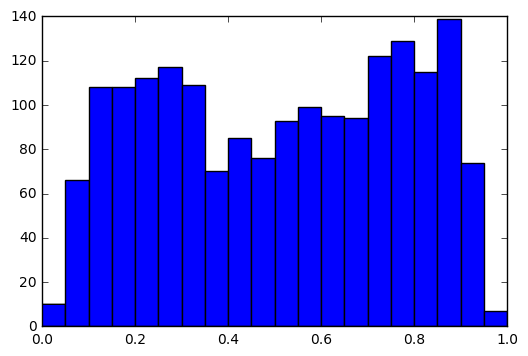

In [76]:
pyplot.hist(map(operator.itemgetter(1), model.predict_proba(tourney_x)),
            bins=numpy.linspace(0, 1, 21))

(array([   1.,   62.,  118.,  145.,  140.,  143.,  115.,   84.,   93.,
         114.,  117.,  125.,  116.,  133.,  134.,  159.,  207.,  168.,
          97.,    7.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

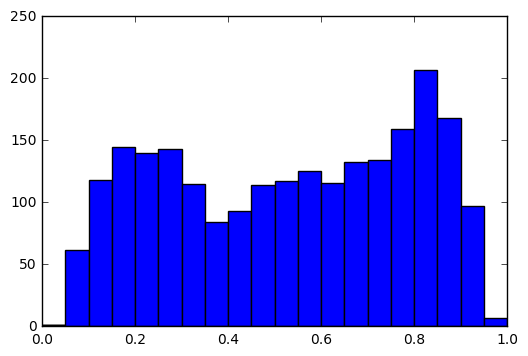

In [110]:
## Load 2017 data
import operator
submission = pandas.read_csv("SampleSubmission.csv")
original_columns = submission.columns
sub_split = submission["Id"].str.split("_")
submission["Season"] = sub_split.map(operator.itemgetter(0)).astype(numpy.int32)
submission["home_team"] = sub_split.map(operator.itemgetter(1)).astype(numpy.int32)
submission["away_team"] = sub_split.map(operator.itemgetter(2)).astype(numpy.int32)

submission.head()
submission = submission.merge(season_averages, how="inner",
                          left_on=["Season", "home_team"],
                          right_on=["Season", "Team_Id"],
                          suffixes=("_woah", "_home"))

submission = submission.merge(season_averages, how="inner",
                          left_on=["Season", "away_team"],
                          right_on=["Season", "Team_Id"],
                          suffixes=("_home", "_away"))
submission.head()
sub_x = scaler.transform(submission[input_columns])

pyplot.hist(map(operator.itemgetter(1), gbm.predict_proba(sub_x)),
            bins=numpy.linspace(0, 1, 21))


  32/2278 [..............................] - ETA: 0s

(array([   9.,   56.,  104.,  101.,  119.,  127.,  132.,  101.,  121.,
         137.,  140.,  137.,  155.,  120.,  154.,  200.,  159.,  140.,
          63.,    3.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

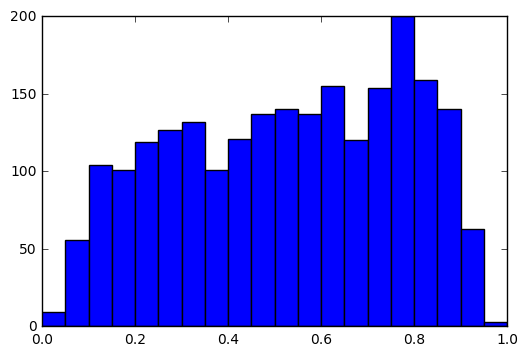

In [111]:
pyplot.hist(map(operator.itemgetter(1), mlp.predict_proba(sub_x)),
            bins=numpy.linspace(0, 1, 21))


In [116]:
submission_mlp = submission[original_columns].copy()
submission_mlp["Pred"] = map(operator.itemgetter(1), mlp.predict_proba(sub_x))
submission_mlp.to_csv("MLPSubmission.csv", index=False)

  32/2278 [..............................] - ETA: 0s

In [117]:
submission_gbm = submission[original_columns].copy()
submission_gbm["Pred"] = map(operator.itemgetter(1), gbm.predict_proba(sub_x))
submission_gbm.to_csv("GBMSubmission.csv", index=False)